1. Pose a prediction question that can be answered with data and a machine learning model

# 

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, roc_curve
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import requests
import pandas as pd
from pandas.io.json import json_normalize

# Part 1
Walk through the data science process:

### 1. Pose a prediction question that can be answered with data and a machine learning model
Can I predict wine quality from its chemical features and whether or not it comes from it the wine or red data set?


### 2. Collect data to answer your question via webscraping, APIs and/or combining several readily available dataset (i.e. kaggle, uci ML repo, etc.)
I had to change to a ready dataset from the web because the original datasets on "https://data.cityofnewyork.us/data.json" moved. The order of their data sets changed and one of the ones that I was using was removed from the website on December 9th.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_wine = pd.read_csv(url, sep = ';')

In [3]:
url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white_wine = pd.read_csv(url2, sep = ';')

In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 3. Clean / wrangle your data
### 4. Create features

In [8]:
#Adding a categorical variable
red_wine['type'] = "red"  
white_wine['type'] = "white"

In [9]:
wine = pd.concat([red_wine,white_wine])

In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


### 5. Explore the data through Exploratory Data Analysis

##### Scale the data with the MaxMinScaler from sklearn.preprocessing.

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [12]:
numWine = wine.loc[:,'fixed acidity':'quality']
numWine.to_numpy()

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [13]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(numWine)
X = scaled
X

array([[0.29752066, 0.41333333, 0.        , ..., 0.19101124, 0.20289855,
        0.33333333],
       [0.33057851, 0.53333333, 0.        , ..., 0.25842697, 0.26086957,
        0.33333333],
       [0.33057851, 0.45333333, 0.02409639, ..., 0.24157303, 0.26086957,
        0.33333333],
       ...,
       [0.2231405 , 0.10666667, 0.11445783, ..., 0.13483146, 0.20289855,
        0.5       ],
       [0.14049587, 0.14      , 0.18072289, ..., 0.08988764, 0.69565217,
        0.66666667],
       [0.18181818, 0.08666667, 0.22891566, ..., 0.05617978, 0.55072464,
        0.5       ]])

##### Perform a cluster analysis on these wines using k-means.
##### Look at a plot of WCSS versus number of clusters to help choose the optimal number of clusters

In [14]:
wcss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0.5, 0, 'Number of clusters')

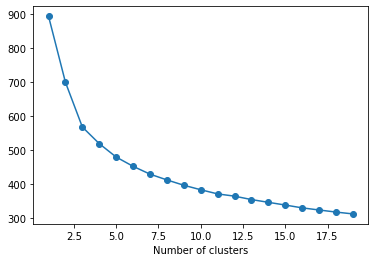

In [15]:
plt.plot(np.arange(1,20), wcss, marker = "o")
plt.xlabel('Number of clusters')

#####  To me it seems that the elbow is closest to 5 groups or clusters

##### Make a plot of the first two principal components colored by predicted cluster label

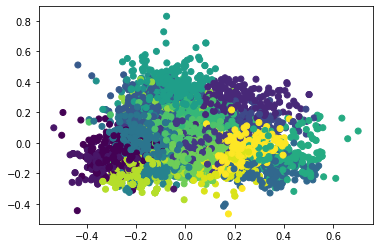

In [16]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
pca.fit(X)
pccomp = pca.transform(X)
plt.scatter(pccomp[:,0], pccomp[:,1], c = kmeans.labels_)

##### It apears that there is not much seperation between the groups (at least in a 2D array). Let's see if we can by way of some models.

### 6. Analyze the data with multiple machine learning approaches

In [17]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [18]:
#SPLIT the data into testing data and training data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [19]:
y = wine.loc[:,'quality']
wine2 = wine.drop('quality', axis=1)
x = wine2
x = pd.get_dummies(x)
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

(6497, 13)
(6497,)


In [20]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
536,7.9,0.345,0.51,15.3,0.047,54.0,171.0,0.99870,3.09,0.51,9.1,0,1
3479,5.9,0.320,0.28,4.7,0.039,34.0,94.0,0.98964,3.22,0.57,13.1,0,1
3234,6.6,0.250,0.34,3.0,0.054,22.0,141.0,0.99338,3.26,0.47,10.4,0,1
3597,6.6,0.190,0.28,11.8,0.042,54.0,137.0,0.99492,3.18,0.37,10.8,0,1
4531,7.3,0.280,0.54,12.9,0.049,62.0,162.5,0.99840,3.06,0.45,9.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,7.3,0.220,0.49,9.4,0.034,29.0,134.0,0.99390,2.99,0.32,11.0,0,1
2579,6.4,0.280,0.56,1.7,0.156,49.0,106.0,0.99354,3.10,0.37,9.2,0,1
3310,6.3,0.300,0.29,2.1,0.048,33.0,142.0,0.98956,3.22,0.46,12.9,0,1
1177,7.1,0.660,0.00,2.4,0.052,6.0,11.0,0.99318,3.35,0.66,12.7,1,0


In [21]:
y_test

1420    4
1796    5
4433    5
4656    7
383     6
       ..
705     5
1007    5
1601    6
4625    5
662     6
Name: quality, Length: 1300, dtype: int64

Test Linear Regression, KNN, and Decision Tree Regressor Models

### 7. Evaluate each model

In [22]:
lr_pipe = Pipeline(steps = [("feature",PolynomialFeatures(interaction_only=True)),
                         ("scalar",StandardScaler()),("model",LinearRegression(n_jobs=-1))])
lr_pipe.fit(x_train,y_train)
knn_pipe = Pipeline(steps = [("feature",PolynomialFeatures(interaction_only=True)),
                         ("scalar",StandardScaler()),("model",KNeighborsRegressor(n_jobs=-1))])
knn_pipe.fit(x_train,y_train)
dt_pipe = Pipeline(steps = [("feature",PolynomialFeatures(interaction_only=True)),
                         ("scalar",StandardScaler()),("model",DecisionTreeRegressor())])
dt_pipe.fit(x_train,y_train)
print("Linear Regression Model's Test score: ",lr_pipe.score(x_test,y_test))
print("Linear Regression Model's Train score: ",lr_pipe.score(x_train,y_train))
print("KNN Regression Model's Test score: ",knn_pipe.score(x_test,y_test))
print("KNN Regression Model's Train score: ",knn_pipe.score(x_train,y_train))
print("DT Regression Model's Test score: ",dt_pipe.score(x_test,y_test))
print("DT Regression Model's Train score: ",dt_pipe.score(x_train,y_train))

Linear Regression Model's Test score:  0.30746325191269097
Linear Regression Model's Train score:  0.3719299743574145
KNN Regression Model's Test score:  0.3444642454391532
KNN Regression Model's Train score:  0.5763907539054585
DT Regression Model's Test score:  0.07186808090241703
DT Regression Model's Train score:  1.0


In [27]:
#Further Model Evaluation
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(nthread=-1)
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
xgb_test_predictions = [round(value) for value in y_pred]
    
y_pred = xgb.predict(x_train)
xgb_train_predictions = [round(value) for value in y_pred]

print("Training Accuracy:", accuracy_score(xgb_train_predictions, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", accuracy_score(xgb_test_predictions, y_test)) # Accuracy of the test.


[21:52:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.990379064845103
Testing Accuracy: 0.6915384615384615


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 20, random_state = 42,n_jobs=-1)
rf.fit(x_train, y_train); #n_estimators is the number of decision trees being used.

Testing Accuracy: 0.6684615384615384


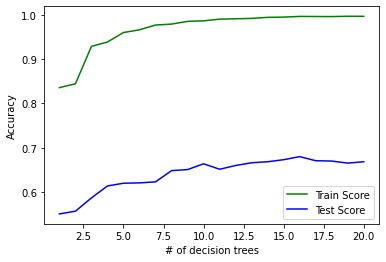

In [25]:
print("Testing Accuracy:", rf.score(x_test, y_test) )#Accuracy of the test.

train_score_array = []
test_score_array = []

for k in range (1, 21):
    rf = RandomForestClassifier(n_estimators = k, random_state = 42,n_jobs=-1)
    rf.fit(x_train, y_train)
    train_score_array.append(rf.score(x_train, y_train))
    test_score_array.append(rf.score(x_test, y_test))
x_axis = range(1,21) # x_axis values
%matplotlib inline
#x-values, y-values, Name for legend, color
plt.plot(x_axis, train_score_array , label = "Train Score", c= "g") #Plots a green line
plt.plot(x_axis, test_score_array, label = "Test Score", c= "b")  #Plots a blue line
plt.xlabel('# of decision trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = rf.predict(x_test)
rf_test_pred = [round(value) for value in y_pred]

y_pred = rf.predict(x_train)
rf_train_pred = [round(value) for value in y_pred]

While KNN, Linear Regression and DT didn't do that well, XGB Boost and Random Forest Classifiers did much better. They both were prone to over fitting the training data, but were able to get up towards 70% accuracy on the testing data.

### 8. Answer the original question

Although I can predict wine quality from it's chemical features and whether it was red or white wine....I cannot do it very well. I had hoped that adding the feature for red or white wine would help increase the predicting power.

### 9. Understand and explain potential sources of bias in how your data/model answers your question of interest

There are several possible sources of Bias in my models. One of them is that they are slightly over fitting the training data as you can see in the graph above, but there isn't a strong downward curve in the testing data, which may also indicate that I didn't over fit the data. Another possible source of bias in my model is multicollinearity. I didn't check to see if some of the features needed to be dropped or combined due to hiving a high multilinearity. This is very possible in some of the fields like fixed acidity and PH. 

### Communicate the highlights of your work in a markdown report (this should be the Readme file of a Github repository)
### Post all your work (including clean, well-documented, and reproducible code) in a public Github repository

# Part 2
Record a 5 minute video presentation of your project. Your presentation should be self contained, meaning that someone could watch your video and know the main purpose and conclusions of your work without having seen your Github repository. You should clearly define the question you are answer / purpose of the project as well as the main highlights and/or conclusions.

Rules

### Your project should be original for this class
### Your project should be individual work
### You can work with a group (of no more than 4 people) for data collection, but you must pose your own research question
### Your project should be original. You can be inspired by something you have seen on kaggle, Github, another class, work, etc. but should be original work.
### For full points, don’t just use a readily available dataset but either:
    combine two or more readily available sources of data, OR
    collect your own data
###  #1 and #2 will be due by November 20
#### The final project will be due December 10